# **INTRODUCTION**

Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time.Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and localitY. The objective is to predict the sales for the weeks in advance and minimize the given metric as much as possible.

Random forest regressor and Linear regressor are used to train the model and obtain the best prediction. Randomized CV is used for hyperarameter tuning. Using Feature engineering technique significant features are identified. Various visualisation techniques such as correlation matrix, pairplot (scatter plot), histogram are implemented in the study.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import mean_squared_error

**READING DATASETS FROM THE GIT**

In [94]:
url = 'https://raw.githubusercontent.com/Sharmadhaparthi/Sharmadha_Parthiban_DSE/main/train.csv'
df_rsales = pd.read_csv(url)

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


In [95]:
url = 'https://raw.githubusercontent.com/Sharmadhaparthi/Sharmadha_Parthiban_DSE/main/store.csv'
df_store = pd.read_csv(url)

In [4]:
url = 'https://raw.githubusercontent.com/Sharmadhaparthi/Sharmadha_Parthiban_DSE/main/test.csv'
df_test = pd.read_csv(url)


In [96]:
url = 'https://raw.githubusercontent.com/Sharmadhaparthi/Sharmadha_Parthiban_DSE/main/sample_submission.csv'
submission_df = pd.read_csv(url)

## **DISPLAY OF INFORMATION RELATED TO THE RESPECTIVE DATASETS**

In [97]:
df_rsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [99]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# **EXPLORATORY DATA ANALYSIS**
Exploratory data analysis is performed to get maximum insights from the data.
Here, we are performing the following analysis

*   Checking and displaying the statistical values of the dataset.
*   Analysing the relation between the dependant and independant variables
*   Checking for the null values and replacing them with the mean.


**DISPLAY OF STATISTICAL INFORMATION FOR THE DATASET**

In [8]:
df_rsales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# **HISTOGRAM**

Histogram is a graphical representation of the distribution of a dataset. It shows the underlying probability distribution of a single continuous numerical variable.

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

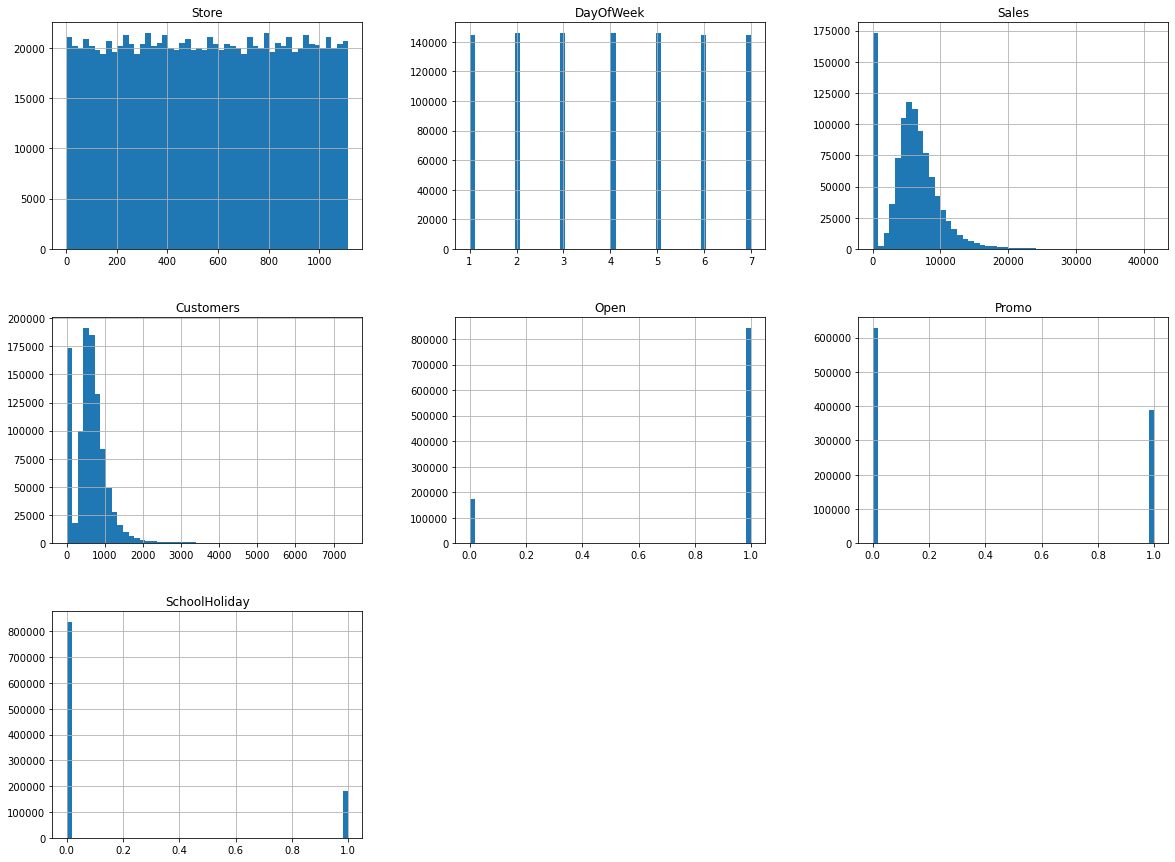

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

df_rsales.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

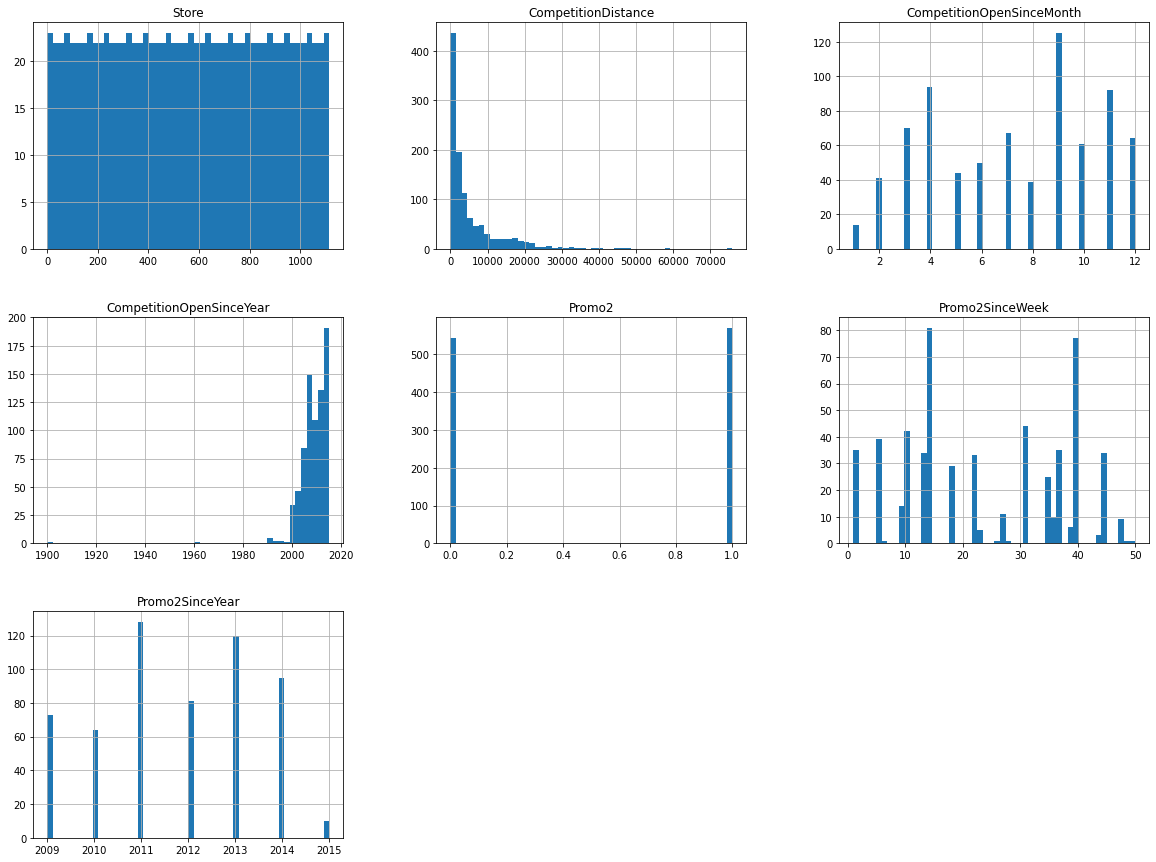

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

df_store.hist(bins=50, figsize=(20,15))

# **CHECKING FOR NULL VALUES**

In [12]:
df_rsales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

It can be inferred that training dataset has **no null values.**

In [13]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

It can be inferred that columns Competition Distance,Competition open since month, Competition open since year Promo2 since week, Promo2 since year, Promo interval from store dataset **has null values.**

# **PRE DEFINED FUNCTION FOR PREPROCESSING DATA**

*   To convert catagorical values
*   To calculate mean



In [14]:
from pandas.api.types import is_string_dtype,is_numeric_dtype
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [15]:
df_rsales_1 = str_to_cat(df_rsales)
df_rsales_1.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# **SIZE OF THE DATAFRAMES**

In [16]:
df_rsales_1.shape

(1017209, 9)

In [17]:
df_rsales_1['Date'] = pd.to_datetime(df_rsales_1['Date'], errors='coerce')
df_rsales_1['Month'] = df_rsales_1['Date'].dt.month
df_rsales_1['Year'] = df_rsales_1['Date'].dt.year

del df_rsales_1['Date']

In [18]:
df_rsales_1.shape

(1017209, 10)

In [19]:
df_rsales_1.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,5263,555,1,1,0,1,7,2015
1,2,5,6064,625,1,1,0,1,7,2015
2,3,5,8314,821,1,1,0,1,7,2015
3,4,5,13995,1498,1,1,0,1,7,2015
4,5,5,4822,559,1,1,0,1,7,2015


<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

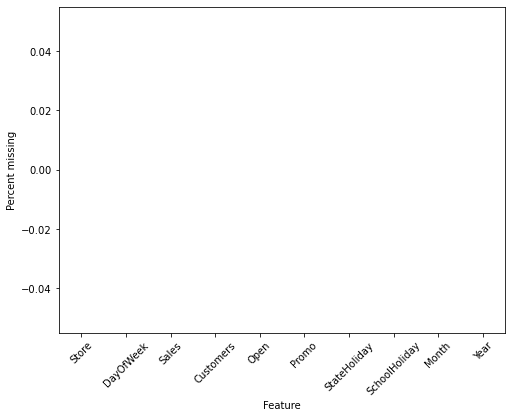

In [20]:
#Checking null values through visualization 
null_vals = df_rsales_1.isnull().sum()/len(df_rsales)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

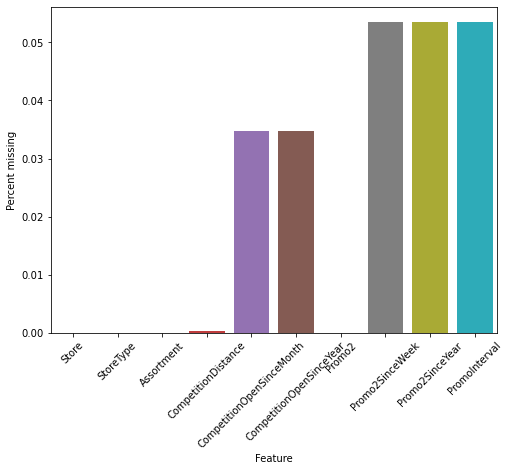

In [21]:
#Checking null values through visualization 
null_vals = df_store.isnull().sum()/len(df_rsales)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [22]:
df_store.info()
df_store.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


(1115, 10)

In [23]:
df_store_1 = str_to_cat(df_store)
df_store_2,my_table = mydf_preprocessor(df_store_1,null_table = None)
df_store_2.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistance_na,CompetitionOpenSinceMonth_na,CompetitionOpenSinceYear_na,Promo2SinceWeek_na,Promo2SinceYear_na
0,1,3,1,1270.0,9.0,2008.0,0,22.0,2012.0,0,False,False,False,True,True
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2,False,False,False,False,False
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2,False,False,False,False,False
3,4,3,3,620.0,9.0,2009.0,0,22.0,2012.0,0,False,False,False,True,True
4,5,1,1,29910.0,4.0,2015.0,0,22.0,2012.0,0,False,False,False,True,True


In [24]:
df_store_2.shape

(1115, 15)

# **CORELATION MATRIX**

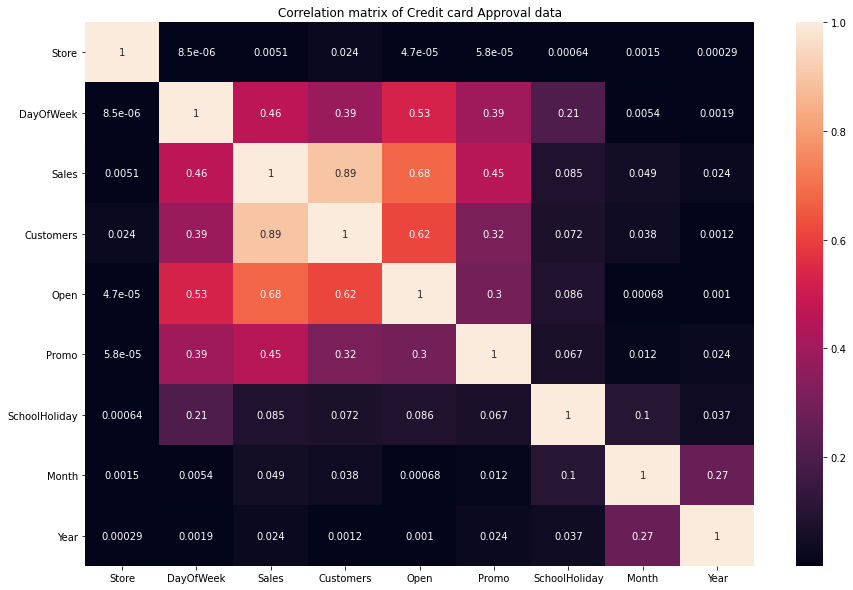

In [25]:
# correlation matix to find out the important features
plt.figure(figsize=(15,10))
plt.title("Correlation matrix of Credit card Approval data")
sns.heatmap(df_rsales_1.corr().abs(), annot=True)
plt.show()

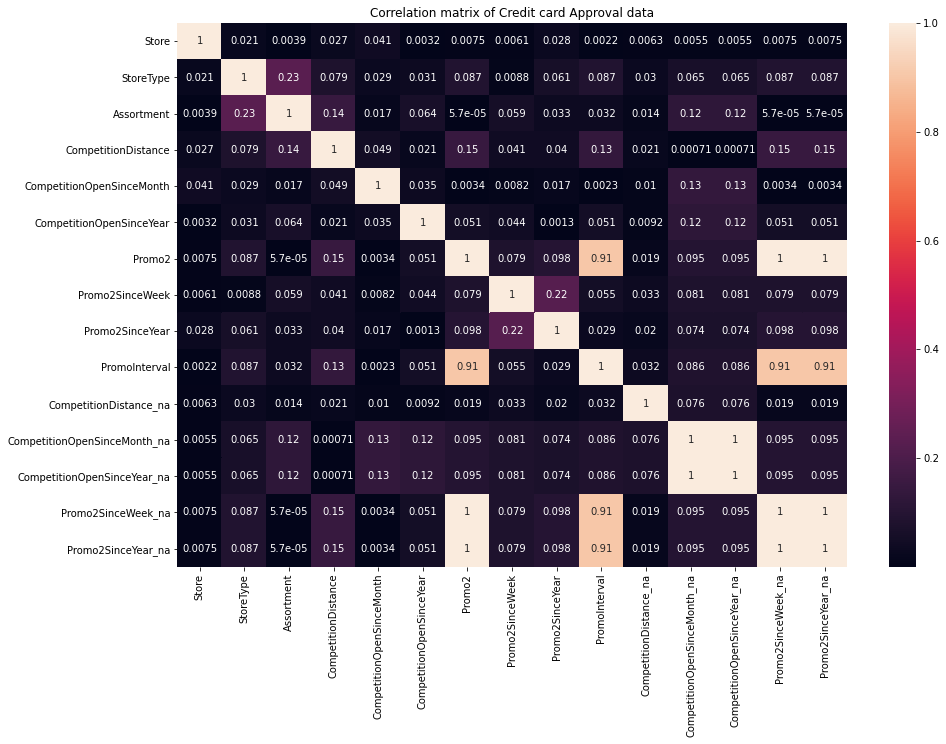

In [26]:
plt.figure(figsize=(15,10))
plt.title("Correlation matrix of Credit card Approval data")
sns.heatmap(df_store_2.corr().abs(), annot=True)
plt.show()

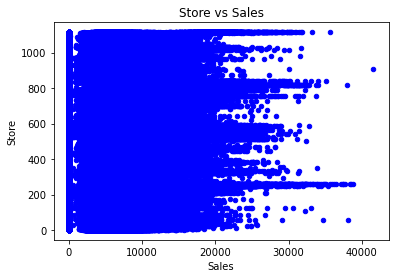

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

ax = plt.gca()

#rand_pd_1.plot(kind='line',x='param_n_neighbors',y='num_children',ax=ax)
df_rsales_1.plot(kind='scatter',x='Sales',y='Store', color='blue', ax=ax,
             title='Store vs Sales')

plt.show() 

In [28]:
df_rsales_1.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,5263,555,1,1,0,1,7,2015
1,2,5,6064,625,1,1,0,1,7,2015
2,3,5,8314,821,1,1,0,1,7,2015
3,4,5,13995,1498,1,1,0,1,7,2015
4,5,5,4822,559,1,1,0,1,7,2015


In [29]:
df_rsales_1['is_holiday_state'] = df_rsales_1['StateHoliday'].map({'0': 0,
                                                 'a': 1,
                                                 'b': 1,
                                                 'c': 1
                                                }
)


del df_rsales_1['StateHoliday']

In [30]:
df_rsales_1.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Month,Year,is_holiday_state
0,1,5,5263,555,1,1,1,7,2015,0.0
1,2,5,6064,625,1,1,1,7,2015,0.0
2,3,5,8314,821,1,1,1,7,2015,0.0
3,4,5,13995,1498,1,1,1,7,2015,0.0
4,5,5,4822,559,1,1,1,7,2015,0.0


# **MERGING TRAINING AND STORE DATASET**

Here we again perform EDA for the merged dataset.

In [31]:
df_merge = df_rsales_1.join(df_store_2.set_index('Store'), on='Store', how='inner')

In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Store                         1017209 non-null  int64  
 1   DayOfWeek                     1017209 non-null  int64  
 2   Sales                         1017209 non-null  int64  
 3   Customers                     1017209 non-null  int64  
 4   Open                          1017209 non-null  int64  
 5   Promo                         1017209 non-null  int64  
 6   SchoolHoliday                 1017209 non-null  int64  
 7   Month                         1017209 non-null  int64  
 8   Year                          1017209 non-null  int64  
 9   is_holiday_state              886137 non-null   float64
 10  StoreType                     1017209 non-null  int8   
 11  Assortment                    1017209 non-null  int8   
 12  CompetitionDistance         

In [33]:
df_merge.isnull().sum()

Store                                0
DayOfWeek                            0
Sales                                0
Customers                            0
Open                                 0
Promo                                0
SchoolHoliday                        0
Month                                0
Year                                 0
is_holiday_state                131072
StoreType                            0
Assortment                           0
CompetitionDistance                  0
CompetitionOpenSinceMonth            0
CompetitionOpenSinceYear             0
Promo2                               0
Promo2SinceWeek                      0
Promo2SinceYear                      0
PromoInterval                        0
CompetitionDistance_na               0
CompetitionOpenSinceMonth_na         0
CompetitionOpenSinceYear_na          0
Promo2SinceWeek_na                   0
Promo2SinceYear_na                   0
dtype: int64

In [34]:
df_merge_1,my_table = mydf_preprocessor(df_merge,null_table = None)
df_merge_1.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Month,Year,is_holiday_state,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistance_na,CompetitionOpenSinceMonth_na,CompetitionOpenSinceYear_na,Promo2SinceWeek_na,Promo2SinceYear_na,is_holiday_state_na
0,1,5,5263,555,1,1,1,7,2015,0.0,...,0,22.0,2012.0,0,False,False,False,True,True,False
1115,1,4,5020,546,1,1,1,7,2015,0.0,...,0,22.0,2012.0,0,False,False,False,True,True,False
2230,1,3,4782,523,1,1,1,7,2015,0.0,...,0,22.0,2012.0,0,False,False,False,True,True,False
3345,1,2,5011,560,1,1,1,7,2015,0.0,...,0,22.0,2012.0,0,False,False,False,True,True,False
4460,1,1,6102,612,1,1,1,7,2015,0.0,...,0,22.0,2012.0,0,False,False,False,True,True,False


In [35]:
df_merge_1.isnull().sum()

Store                           0
DayOfWeek                       0
Sales                           0
Customers                       0
Open                            0
Promo                           0
SchoolHoliday                   0
Month                           0
Year                            0
is_holiday_state                0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
CompetitionDistance_na          0
CompetitionOpenSinceMonth_na    0
CompetitionOpenSinceYear_na     0
Promo2SinceWeek_na              0
Promo2SinceYear_na              0
is_holiday_state_na             0
dtype: int64

In [36]:
df_merge_1.shape

(1017209, 25)

In [37]:
df_teststore = df_test.join(df_store_2.set_index('Store'), on='Store', how='inner')

In [38]:
df_teststore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            41088 non-null  int64  
 1   Store                         41088 non-null  int64  
 2   DayOfWeek                     41088 non-null  int64  
 3   Date                          41088 non-null  object 
 4   Open                          41077 non-null  float64
 5   Promo                         41088 non-null  int64  
 6   StateHoliday                  41088 non-null  object 
 7   SchoolHoliday                 41088 non-null  int64  
 8   StoreType                     41088 non-null  int8   
 9   Assortment                    41088 non-null  int8   
 10  CompetitionDistance           41088 non-null  float64
 11  CompetitionOpenSinceMonth     41088 non-null  float64
 12  CompetitionOpenSinceYear      41088 non-null  float64
 13  P

In [39]:
df_teststore.shape

(41088, 22)

In [40]:
df_teststore.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
CompetitionDistance_na           0
CompetitionOpenSinceMonth_na     0
CompetitionOpenSinceYear_na      0
Promo2SinceWeek_na               0
Promo2SinceYear_na               0
dtype: int64

In [41]:
df_teststore.shape

(41088, 22)

In [42]:
df_teststore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            41088 non-null  int64  
 1   Store                         41088 non-null  int64  
 2   DayOfWeek                     41088 non-null  int64  
 3   Date                          41088 non-null  object 
 4   Open                          41077 non-null  float64
 5   Promo                         41088 non-null  int64  
 6   StateHoliday                  41088 non-null  object 
 7   SchoolHoliday                 41088 non-null  int64  
 8   StoreType                     41088 non-null  int8   
 9   Assortment                    41088 non-null  int8   
 10  CompetitionDistance           41088 non-null  float64
 11  CompetitionOpenSinceMonth     41088 non-null  float64
 12  CompetitionOpenSinceYear      41088 non-null  float64
 13  P

In [43]:
df_teststore.shape

(41088, 22)

In [44]:
df_teststore['Date'] = pd.to_datetime(df_teststore['Date'], errors='coerce')
df_teststore['Month'] = df_teststore['Date'].dt.month
df_teststore['Year'] = df_teststore['Date'].dt.year

del df_teststore['Date']

In [45]:
df_teststore_1 = str_to_cat(df_teststore)
df_teststore_1,my_table = mydf_preprocessor(df_teststore,null_table = None)
df_teststore_1.head(5)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceYear,PromoInterval,CompetitionDistance_na,CompetitionOpenSinceMonth_na,CompetitionOpenSinceYear_na,Promo2SinceWeek_na,Promo2SinceYear_na,Month,Year,Open_na
0,1,1,4,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
856,857,1,3,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
1712,1713,1,2,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
2568,2569,1,1,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
3424,3425,1,7,0.0,0,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False


In [46]:
df_teststore_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            41088 non-null  int64  
 1   Store                         41088 non-null  int64  
 2   DayOfWeek                     41088 non-null  int64  
 3   Open                          41088 non-null  float64
 4   Promo                         41088 non-null  int64  
 5   StateHoliday                  41088 non-null  int8   
 6   SchoolHoliday                 41088 non-null  int64  
 7   StoreType                     41088 non-null  int8   
 8   Assortment                    41088 non-null  int8   
 9   CompetitionDistance           41088 non-null  float64
 10  CompetitionOpenSinceMonth     41088 non-null  float64
 11  CompetitionOpenSinceYear      41088 non-null  float64
 12  Promo2                        41088 non-null  int64  
 13  P

DROPPING TARGET VARIABLE
Here sale is the target variable and it is dropped.

In [47]:
x = df_merge_1.drop('Sales', axis=1)
y = df_merge_1['Sales']
print(x.shape)
print(y.shape)

(1017209, 24)
(1017209,)


In [48]:
print(x.shape,y.shape)

(1017209, 24) (1017209,)


In [49]:
x_test = df_teststore.copy()

In [50]:
x_test.shape

(41088, 24)

# **NORMALISATION**


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
print(scaler.mean_)

[5.58429727e+02 3.99834056e+00 6.33145946e+02 8.30106694e-01
 3.81514517e-01 1.78646669e-01 5.84676207e+00 2.01383229e+03
 3.05247004e-02 2.20746671e+00 1.93514116e+00 5.42202080e+03
 7.46989950e+00 2.00910657e+03 5.00563798e-01 2.26352618e+01
 2.01187625e+03 9.80349171e-01 2.59730301e-03 3.17877644e-01
 3.17877644e-01 4.99436202e-01 4.99436202e-01 1.28854542e-01]


In [52]:
scaler = StandardScaler()
scaler.fit(x_test)
print(scaler.mean_)

[2.05445000e+04 5.55899533e+02 3.97916667e+00 8.54361371e-01
 3.95833333e-01 1.00438084e+00 4.43487150e-01 2.25233645e+00
 2.00116822e+00 5.08212617e+03 7.39252336e+00 2.00914486e+03
 5.80607477e-01 2.34088785e+01 2.01189603e+03 1.12850467e+00
 2.33644860e-03 3.70327103e-01 3.70327103e-01 4.19392523e-01
 4.19392523e-01 8.35416667e+00 2.01500000e+03 2.67718069e-04]


In [53]:
x_test.info

<bound method DataFrame.info of           Id  Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
0          1      1          4   1.0      1             1              0   
856      857      1          3   1.0      1             1              0   
1712    1713      1          2   1.0      1             1              0   
2568    2569      1          1   1.0      1             1              0   
3424    3425      1          7   0.0      0             1              0   
...      ...    ...        ...   ...    ...           ...            ...   
37663  37664   1115          3   1.0      1             1              1   
38519  38520   1115          2   1.0      1             1              1   
39375  39376   1115          1   1.0      1             1              1   
40231  40232   1115          7   0.0      0             1              1   
41087  41088   1115          6   1.0      0             1              1   

       StoreType  Assortment  CompetitionDistance  ... 

In [54]:
x_test.head(5)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceYear,PromoInterval,CompetitionDistance_na,CompetitionOpenSinceMonth_na,CompetitionOpenSinceYear_na,Promo2SinceWeek_na,Promo2SinceYear_na,Month,Year,Open_na
0,1,1,4,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
856,857,1,3,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
1712,1713,1,2,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
2568,2569,1,1,1.0,1,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False
3424,3425,1,7,0.0,0,1,0,3,1,1270.0,...,2012.0,0,False,False,False,True,True,9,2015,False


# **RANDOM FOREST REGRESSOR**

**i)Fitting the model to the training set**


In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 30, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(n_estimators=30, random_state=0)

**ii)Predicting using the test set**

In [56]:
y_pred = regressor.predict(x_test)
y_pred.shape

(41088,)

In [57]:
y_pred

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       27.6       , 10.73333333])

In [58]:
submission_df['Sales']  = y_pred

# **FEATURE IMPORTANCE**
After training the dataset feature importance is calculated.

<AxesSubplot:xlabel='Importance Score', ylabel='Feature'>

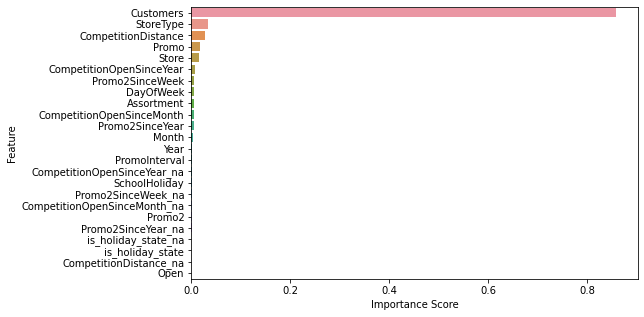

In [59]:
feat_imps = pd.DataFrame(regressor.feature_importances_, index = x.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,5))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

From the above output, we can conclude that Customers, Store type, Competition distance, Promo, Store are the significant features.

From the feature importance scores a new data frame is formed to calculate the accuracy on the validation dataset

In [60]:
df_feat = df_merge_1[['Customers', 'StoreType', 'CompetitionDistance', 'Promo', 'Store',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'DayOfWeek',
       'Assortment', 'CompetitionOpenSinceMonth',
       'Promo2SinceYear','Sales']]

In [61]:
x_feat = df_feat.drop('Sales', axis=1)
y_feat = df_feat['Sales']
print(x_feat.shape)
print(y_feat.shape)

(1017209, 11)
(1017209,)


In [62]:
x_feat

,Customers,StoreType,CompetitionDistance,Promo,Store,CompetitionOpenSinceYear,Promo2SinceWeek,DayOfWeek,Assortment,CompetitionOpenSinceMonth,Promo2SinceYear
0,555,3,1270.0,1,1,2008.0,22.0,5,1,9.0,2012.0
1115,546,3,1270.0,1,1,2008.0,22.0,4,1,9.0,2012.0
2230,523,3,1270.0,1,1,2008.0,22.0,3,1,9.0,2012.0
3345,560,3,1270.0,1,1,2008.0,22.0,2,1,9.0,2012.0
4460,612,3,1270.0,1,1,2008.0,22.0,1,1,9.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...
1012749,339,4,5350.0,0,1115,2010.0,22.0,6,3,8.0,2012.0
1013864,326,4,5350.0,0,1115,2010.0,22.0,5,3,8.0,2012.0
1014979,300,4,5350.0,0,1115,2010.0,22.0,4,3,8.0,2012.0
1016094,305,4,5350.0,0,1115,2010.0,22.0,3,3,8.0,2012.0


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_feat)
print(scaler.mean_)

[6.33145946e+02 2.20746671e+00 5.42202080e+03 3.81514517e-01
 5.58429727e+02 2.00910657e+03 2.26352618e+01 3.99834056e+00
 1.93514116e+00 7.46989950e+00 2.01187625e+03]


In [64]:
df_teststore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            41088 non-null  int64  
 1   Store                         41088 non-null  int64  
 2   DayOfWeek                     41088 non-null  int64  
 3   Open                          41088 non-null  float64
 4   Promo                         41088 non-null  int64  
 5   StateHoliday                  41088 non-null  int8   
 6   SchoolHoliday                 41088 non-null  int64  
 7   StoreType                     41088 non-null  int8   
 8   Assortment                    41088 non-null  int8   
 9   CompetitionDistance           41088 non-null  float64
 10  CompetitionOpenSinceMonth     41088 non-null  float64
 11  CompetitionOpenSinceYear      41088 non-null  float64
 12  Promo2                        41088 non-null  int64  
 13  P

In [65]:
df_teststore_feat= df_teststore_1[['StoreType', 'CompetitionDistance', 'Promo', 'Store',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'DayOfWeek',
       'Assortment', 'CompetitionOpenSinceMonth',
       'Promo2SinceYear','Month']]

In [66]:
x_test_1 = df_teststore_feat.copy()

In [67]:
x_feat.shape

(1017209, 11)

# **Fitting the model to the training set**

In [68]:
#Fitting the model to the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_feat, y_feat)

RandomForestRegressor(n_estimators=10, random_state=0)

# **Predicting using the test set**

In [69]:
y_pred_1 = regressor.predict(x_test_1)

In [70]:
y_pred_1

array([0., 0., 0., ..., 0., 0., 0.])

# **RANDOM GRID CV**
Random grid is used to search for best hyperparameters but we first create the base model to tune the hyper parameters.

In [71]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [72]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=0,n_jobs = -1)
# Fit the random search model
rf_random.fit(x_test_1, y_pred_1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=0, verbose=2)

In [73]:
y_pred_2 = rf_random.predict(x_test_1)
y_pred_2.shape

(41088,)

In [74]:
y_pred_2

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
#Getting the results in Dataframe
random_sear_pd=pd.DataFrame(rf_random.cv_results_)
random_sear_pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.18967,0.007368,0.036458,0.007366,130,2,2,sqrt,10,False,"{'n_estimators': 130, 'min_samples_split': 2, ...",1.0,1.0,1.0,1.0,0.0,1


In [76]:
rf_random.best_params_
rf_random.best_score_
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=130)

# **LINEAR REGRESSION**

**i)Fitting the model to the training dataset**

In [77]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
# define dataset
x_feat, y_feat = make_regression(n_samples=1000, n_features=11, n_informative=5, random_state=1)
# define the model
model_1 = LinearRegression()
# fit the model
model_1.fit(x_feat, x_feat)

LinearRegression()

In [78]:
y_pred_3 = model_1.predict(x_test_1)
#print(x_val_1.shape)

# **INSTALLATION OF SHAP**

In [79]:
!pip install tensorflow
!pip install shap
!pip install seaborn

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=2630ca0eff20fe551da4d2a15ead01bb265ec3668b0cff6f58e6cb881360ce5f
  Stored in directory: c:\users\ash\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


# **SHAP INTERPRETABILITY**

**Import SHAP Package**

In [80]:
import shap as shap

In [81]:
shap.initjs

<function shap.plots._force.initjs()>

**Creating Tree Explainer object to calculate shap values**

In [82]:
explainer = shap.TreeExplainer(regressor)

**Interpretation of the Prediction**


*   Feature values in pink cause to increase the prediction. 
*   Feature values in blue cause to decrease the prediction.
*   Size of the bar shows the magnitude of the feature's effect.

Sum of all feature SHAP values explain why model prediction was different from the baseline.

In [83]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
x.loc[[856]]

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Month,Year,is_holiday_state,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistance_na,CompetitionOpenSinceMonth_na,CompetitionOpenSinceYear_na,Promo2SinceWeek_na,Promo2SinceYear_na,is_holiday_state_na
856,857,5,990,1,1,1,7,2015,0.0,3,...,1,23.0,2014.0,3,False,False,False,False,False,False


In [84]:
choosen_instance = x.loc[[856]]
shap_values = explainer.shap_values(choosen_instance)



In [85]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

In the above instance, it can be concluded that 

*   Customers have contributed to increase in sales.
*   Competition distance have decreased the sales significantly.
*   Store Type and Promo have also reduced the sales.




In [86]:
x.loc[[120927]]

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Month,Year,is_holiday_state,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistance_na,CompetitionOpenSinceMonth_na,CompetitionOpenSinceYear_na,Promo2SinceWeek_na,Promo2SinceYear_na,is_holiday_state_na
120927,508,2,763,1,1,0,4,2015,0.0,1,...,1,40.0,2011.0,2,False,True,True,False,False,False


In [87]:
choosen_instance = x.loc[[120927]]
shap_values = explainer.shap_values(choosen_instance)

In [88]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

In [89]:
submission_df.head(5)

,Id,Sales
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,27.6


In [90]:
submission_df['Sales']  = y_pred_1

In [91]:
submission_df

,Id,Sales
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
41083,41084,0.0
41084,41085,0.0
41085,41086,0.0
41086,41087,0.0


In [92]:
##Save as csv
submission_df.to_csv('submission_final_1.csv', index=None)

# **CONCLUSION**
Thus sales in advance are predicted using the given data. Feature selection is implemented to extarct the significant features. Also, the accuracy metrics for the model trained using random regressor and linear regressor are displayerd in the respective cells above.

# **REFERENCE**



*    https://www.kaggle.com/vikumsw/explaining-random-forest-model-with-shapely-values
*    https://medium.com/analytics-vidhya/rossmann-store-sales-prediction-998161027abf
*   https://towardsdatascience.com/understanding-feature-extraction-using-correlation-matrix-and-scatter-plots-6c19e968a60c
*   https://medium.com/@serkanemreelci/feature-engineering-and-linear-regression-470dd9879e37
*   https://www.statology.org/how-to-interpret-rmse/
*   https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74



# **LICENSING**

Copyright 2021 Sharmadha Parthiban

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **SUMMARY**

Thus the notebook can be summarized as follows

*   Exploratory Data Analysis was performed for the train, store and test dataset. It includes finding null values, replacement of null values, visualization of the presence of null values.
*   Random Forest Regressor is used for train the model.
*   Linear regressor is other algorithm used for the model to be trained.
*   Feature Engineering is implemented to determine the significant featues and use it to in the training of the model.
*   Radomized search CV is used for the hyperparameter tuning of random forest regressor.
*   SHAP is implemented for the interpretability of the predictions.


